# Data from World Development indicators



## The Data
For this project , we will be using the famous [World development indicators](https://www.kaggle.com/worldbank/world-development-indicators). 


### The process

    1)Questions
    2)Data Wrangling / Exploration 
    3)Conclusion
    4)Comunication





# 1) Question
#### What has changed over the 30 years with the "BRICS" Countries , in terms of:
    -Income Levels of each country
    -Economic Structure
    -Sustentability
    -Equality
    -Health
    -Education

# 2) Data Wrangling / Exploration

### importing libraries for exploration and plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#!ls
#to see the files in the working folder

In [3]:
data =  pd.read_csv('./Project Files/Indicators.csv')

#### what's the format of the data?

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


### index of the column names

In [6]:
for index, name in enumerate(data.columns):
    print(index,name)

0 CountryName
1 CountryCode
2 IndicatorName
3 IndicatorCode
4 Year
5 Value


### how many countries there are in the dataset?

In [7]:
countries = data[data.columns[0]].unique()
print(len(countries))

247


### how many Country Codes there are in the dataset?

In [8]:
countrycode= data[data.columns[1]].unique()
print(len(countrycode))

247


### how many years  and what is the timeframe for the dataset?

In [9]:
years = data[data.columns[4]].unique()
print("There are data from %i years" %(len(years)))
print("Timeframe: %i to %i" %(min(years),max(years)))

There are data from 56 years
Timeframe: 1960 to 2015


### how many indicators ?

In [10]:
indicators = data[data.columns[2]].unique()
print(len(indicators))

1344


### What are the countries from BRICS

BRICS is the acronym coined for an association of five major emerging national economies: Brazil, Russia, India, China and South Africa(https://en.wikipedia.org/wiki/BRICS)
_________________

### What indicators we're going to use?

##### GNI, GDP
    -GNI (current US$)
    
    -GDP per capita (current US$)
    
    
##### Economic Structure
    -Agriculture, value added (% of GDP)
    
    -Manufacturing, value added (% of GDP)
    
    -Services, etc., value added (% of GDP)
    
#####  External Balances
    
    -External balance on goods and services (% of GDP)
    
    
##### CO2 Emissions
    -CO2 emissions (metric tons per capita)

##### Equality, Health and Education
    -Population, total
    
    -Life expectancy at birth, total (years)
    
    -GINI index (World Bank estimate)
        
    -Birth rate, crude (per 1,000 people)
    
    -Death rate, crude (per 1,000 people)
    
    -Government expenditure on education as % of GDP (%)
    
    -Adult literacy rate, population 15+ years, both sexes (%)
    
    -Intentional homicides (per 100,000 people)   

In [11]:
indicators_l = (["GNI \(current US",
                "GDP per capita \(current US",
                "GDP at market prices \(curren",
                "Agriculture, value added \(% of GDP",
                "Manufacturing, value added \(% of GDP",
                "Services, etc., value added \(% of GDP",
                "Exports of goods and services \(% of GDP",
                "External balance on goods and services \(% of GDP",
                "Imports of goods and services \(% of GDP",
                "CO2 emissions \(metric tons per capita",
                "Population, total",
                "Life expectancy at birth, total \(years",
                "GINI index", 
                "Birth rate, crude \(per 1,000 people",
                "Death rate, crude \(per 1,000 people",
                "Government expenditure on education as ",
                "Adult literacy rate, population 15\+ years, bo",
                "Intentional homicides \(per "])

In [12]:
#for item in indicators_l:
#    print(item)

### Discovering the nomeclatures and countrycodes

##### it's necessary to make a search because we don't know the name used in the dataset for the countries we're trying to observate.
1) i've got some problems because i was searching for "Russia" instead of "Russian Federation" 

2) i'm from "Brazil" so here we write "Brasil" . 

In [13]:
search = ['Bra','Rus','Ind','Chin','South Af']

In [14]:
#Brazil
print("Word to search into country name column \'%s\'" %(search[0]))
print('Country name in the list:')
print(data[data['CountryName'].str.contains(search[0])][data.columns[0]].iloc[0])
print('Country Code in the list:')
print(data[data['CountryName'].str.contains(search[0])][data.columns[1]].iloc[0])

Word to search into country name column 'Bra'
Country name in the list:
Brazil
Country Code in the list:
BRA


### Creating the country_name_list and a country_code_list to search faster:

In [15]:
country_name_list = []
country_code_list = []

for index in range(len(search)):
    country_name_list.append(data[data['CountryName'].str.contains(search[index])][data.columns[0]].iloc[0])
    country_code_list.append(data[data['CountryName'].str.contains(search[index])][data.columns[1]].iloc[0])
    
    
print("Country name list")
print(country_name_list)
print(" ")
print("Country code list")
print(country_code_list)

Country name list
['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
 
Country code list
['BRA', 'RUS', 'IND', 'CHN', 'ZAF']


### Creating dataframes For BRICS

-firs i'll do the process first by making the code for one country and then create a function to do it for other countries

#### Creating a dataframe with 2 masks  for Brazil

In [16]:
#creating a dataframe for brazil
mask_country_code = data['CountryCode'].str.contains(country_code_list[0])
mask_year = (data['Year'] >= 1989)
pd_BRA = data[mask_country_code & mask_year ]

#### mask to selecta data after 1988

In [17]:
mask_year = (data['Year'] >= 1989)

#### Creating a dataframe with all indicators for each country with year mask
- df_'country_code'

In [18]:
#using exec function
for index_c in range(len(country_code_list)):
    exec('mask_country_code = data[\'CountryCode\'].str.contains(country_code_list[index_c])' )
    
    exec('df_%s = data[mask_country_code & mask_year]' %(country_code_list[index_c]))
    
    #exec('df_%s = data[data[\'CountryCode\'].str.contains(country_code_list[index])]' %(country_code_list[index]))

#### Lenght of the dataframes created

In [19]:
for index in range(len(country_code_list)):
    exec('print(\'%s has {} rows \'.format(len(df_%s)))' %(country_code_list[index], country_code_list[index]))


BRA has 22802 rows 
RUS has 15710 rows 
IND has 22080 rows 
CHN has 20640 rows 
ZAF has 21605 rows 


#### Brazil

creating brazil gdp per capita dataset with all columns (df_BRA_GDP_t)

In [20]:
#creating a dataframe with the mask for the gdp per capita
#________________________ Step ____________________________
df_BRA_GDP_t = df_BRA[df_BRA['IndicatorName'].str.contains(indicators_l[1])]
print('{} ,{} dataset'.format(df_BRA_GDP_t['CountryName'].iloc[0],df_BRA_GDP_t['IndicatorName'].iloc[0]))
print('There are {} datapoints '.format(len(df_BRA_GDP_t)))
print('from : {}'.format(min(df_BRA_GDP_t['Year'])))
print('to : {}'.format(max(df_BRA_GDP_t['Year'])))

Brazil ,GDP per capita (current US$) dataset
There are 26 datapoints 
from : 1989
to : 2014


Creating a index dataframe (df_BRA_ind)<br>
Deleting df_BRA_GDP_t

In [21]:
#________________________ Step ____________________________

df_BRA_ind = pd.DataFrame(df_BRA_GDP_t['Value'].values, index = df_BRA_GDP_t['Year'], columns= [df_BRA_GDP_t['IndicatorName'].iloc[0]])

#________________________ Step ____________________________
del(df_BRA_GDP_t)

Creating the second indicator dataframe (df_BRA_*IND_t)

In [22]:
#________________________ Step ____________________________
df_BRA_GNI_t = df_BRA[df_BRA['IndicatorName'].str.contains(indicators_l[0])]
print('{} ,{} dataset'.format(df_BRA_GNI_t['CountryName'].iloc[0],df_BRA_GNI_t['IndicatorName'].iloc[0]))
print('There are {} datapoints '.format(len(df_BRA_GNI_t)))
print('from : {}'.format(min(df_BRA_GNI_t['Year'])))
print('to : {}'.format(max(df_BRA_GNI_t['Year'])))

Brazil ,GNI (current US$) dataset
There are 26 datapoints 
from : 1989
to : 2014


adding the indicator column to indexes dataframe<br>
deleting the indicator<br>

In [23]:
#________________________ Step ____________________________
df_BRA_ind[df_BRA_GNI_t['IndicatorName'].iloc[0]] = pd.DataFrame(df_BRA_GNI_t['Value'].values, index = df_BRA_GNI_t['Year'])
#________________________ Step ____________________________
del(df_BRA_GNI_t)

### Creating dataframe for the countries with the select masks

1) Creating first indicator dataframe tish all columns columns (df_*CTR_*ind_t)<br>
2) Selecting the values and creating a index dataframe (df_*CTR_*ind)<br>
3) Deleting the full dataframe for first index( df_*CTR_*ind_t)<br>
4) Creating a loot to select ,create, add and delete the dataframe for each indicator<br>
5) Creating others indicator dataframes with all columns (df_*CTR_*ind_t)<br>
6) Selecting the values and creating a index dataframe (df_*CTR_*ind)<br>
7) Deleting the full dataframes indexes( df_*CTR_*ind_t)<br>

In [24]:
for index_c in range(len(country_code_list)):
    
    #________________________ Step 01____________________________
    exec('df_%s_%s_t = df_%s[df_%s[\'IndicatorName\'].str.contains(indicators_l[0])]' %(country_code_list[index_c], indicators_l[0][:3],country_code_list[index_c],  country_code_list[index_c]))
    exec('print(\'{} ,{} dataset\'.format(df_%s_%s_t[\'CountryName\'].iloc[0],df_%s_%s_t[\'IndicatorName\'].iloc[0]))' %(country_code_list[index_c], indicators_l[0][:3], country_code_list[index_c], indicators_l[0][:3]))
    exec('print(\'There are {} values \'.format(len(df_%s_%s_t)))' %(country_code_list[index_c], indicators_l[0][:3]))
    exec('print(\'from : {}\'.format(min(df_%s_%s_t[\'Year\'])))' %(country_code_list[index_c], indicators_l[0][:3]))
    exec('print(\'to : {}\'.format(max(df_%s_%s_t[\'Year\'])))' %(country_code_list[index_c], indicators_l[0][:3]))
    print(" ")
    #________________________ Step 02____________________________

    exec('df_%s_ind = pd.DataFrame(df_%s_%s_t[\'Value\'].values, index = df_%s_%s_t[\'Year\'], columns= [df_%s_%s_t[\'IndicatorName\'].iloc[0]])' %(country_code_list[index_c], country_code_list[index_c], indicators_l[0][:3],country_code_list[index_c], indicators_l[0][:3],country_code_list[index_c], indicators_l[0][:3]))

    #________________________ Step 03____________________________
    exec('del(df_%s_%s_t)' %(country_code_list[index_c],indicators_l[0][:3]))
    
    
    #________________________ Step 04____________________________
    for index_ind in range(len(indicators_l)-1):
    # >> print(indicators_l[index_ind +1])
    
        #________________________ Step 05____________________________
        exec('df_%s_%s_t = df_%s[df_%s[\'IndicatorName\'].str.contains(indicators_l[index_ind +1])]' %(country_code_list[index_c], indicators_l[index_ind +1][:3],country_code_list[index_c],country_code_list[index_c]))
        exec('print(\'{} ,{} dataset\'.format(df_%s_%s_t[\'CountryName\'].iloc[0],df_%s_%s_t[\'IndicatorName\'].iloc[0]))' %(country_code_list[index_c], indicators_l[index_ind +1][:3],country_code_list[index_c], indicators_l[index_ind +1][:3]))
        exec('print(\'There are {} values \'.format(len(df_%s_%s_t)))' %(country_code_list[index_c], indicators_l[index_ind +1][:3]))
        exec('print(\'from : {}\'.format(min(df_%s_%s_t[\'Year\'])))' %(country_code_list[index_c], indicators_l[index_ind +1][:3]))
        exec('print(\'to : {}\'.format(max(df_%s_%s_t[\'Year\'])))' %(country_code_list[index_c], indicators_l[index_ind +1][:3]))
        
        #________________________ Step 06____________________________
        exec('df_%s_ind[df_%s_%s_t[\'IndicatorName\'].iloc[0]] = pd.DataFrame(df_%s_%s_t[\'Value\'].values, index = df_%s_%s_t[\'Year\'])' %(country_code_list[index_c],country_code_list[index_c], indicators_l[index_ind +1][:3],country_code_list[index_c], indicators_l[index_ind +1][:3],country_code_list[index_c], indicators_l[index_ind +1][:3]))
        
        #________________________ Step 07____________________________
        exec('del(df_%s_%s_t)' %(country_code_list[index_c], indicators_l[index_ind +1][:3]))
        print(" ")

Brazil ,GNI (current US$) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,GDP per capita (current US$) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,GDP at market prices (current US$) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,Agriculture, value added (% of GDP) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,Manufacturing, value added (% of GDP) dataset
There are 25 values 
from : 1989
to : 2014
 
Brazil ,Services, etc., value added (% of GDP) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,Exports of goods and services (% of GDP) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,External balance on goods and services (% of GDP) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,Imports of goods and services (% of GDP) dataset
There are 26 values 
from : 1989
to : 2014
 
Brazil ,CO2 emissions (metric tons per capita) dataset
There are 23 values 
from : 1989
to : 2011
 
Brazil ,Population, tota

South Africa ,CO2 emissions (metric tons per capita) dataset
There are 23 values 
from : 1989
to : 2011
 
South Africa ,Population, total dataset
There are 26 values 
from : 1989
to : 2014
 
South Africa ,Life expectancy at birth, total (years) dataset
There are 25 values 
from : 1989
to : 2013
 
South Africa ,GINI index (World Bank estimate) dataset
There are 6 values 
from : 1993
to : 2011
 
South Africa ,Birth rate, crude (per 1,000 people) dataset
There are 25 values 
from : 1989
to : 2013
 
South Africa ,Death rate, crude (per 1,000 people) dataset
There are 25 values 
from : 1989
to : 2013
 
South Africa ,Government expenditure on education as % of GDP (%) dataset
There are 21 values 
from : 1989
to : 2013
 
South Africa ,Adult literacy rate, population 15+ years, both sexes (%) dataset
There are 6 values 
from : 1996
to : 2012
 
South Africa ,Intentional homicides (per 100,000 people) dataset
There are 19 values 
from : 1995
to : 2013
 


### Saving datasets as csv Files

In [25]:
df_BRA_ind.to_csv('BRA_indicators.csv', index = True)


for index_c in range(len(country_code_list)):
    exec('df_%s_ind.to_csv(\'%s_indicators.csv\', index = True)'%(country_code_list[index_c], country_code_list[index_c]))

In [26]:
for code in country_code_list:
    print('df_%s deleted' %code)
    exec('del(df_%s)' %(code))

df_BRA deleted
df_RUS deleted
df_IND deleted
df_CHN deleted
df_ZAF deleted


### Exploring the data

#### Multi index DataFrame

In [27]:
#creating a dataframe with all codes and index values
data_all = pd.concat([df_BRA_ind,df_RUS_ind,df_IND_ind,df_CHN_ind,df_ZAF_ind], axis = 1, keys= country_code_list)
#index leveling
data_all.columns.names = ['Country Code', 'Indicator']
data_all.head()

Country Code               BRA                               \
Indicator    GNI (current US$) GDP per capita (current US$)   
Year                                                          
1989              4.485090e+11                  2879.499870   
1990              4.496718e+11                  3071.627953   
1991              5.893500e+11                  3942.403941   
1992              3.930424e+11                  2578.207009   
1993              4.271405e+11                  2774.174127   

Country Code                                     \
Indicator    GDP at market prices (current US$)   
Year                                              
1989                               4.255953e+11   
1990                               4.619518e+11   
1991                               6.028600e+11   
1992                               4.005992e+11   
1993                               4.377986e+11   

Country Code                                      \
Indicator    Agriculture, value added (% of GDP)   
Year                                               
1989                                    8.518877   
1990                                    8.100000   
1991                                    7.789981   
1992                                    7.719998   
1993                                    7.560000   

Country Code                                        \
Indicator    Manufacturing, value added (% of GDP)   
Year                                                 
1989                                     29.528803   
1990                                           NaN   
1991                                     25.343371   
1992                                     24.655931   
1993                                     24.953687   

Country Code                                         \
Indicator    Services, etc., value added (% of GDP)   
Year                                                  
1989                                      48.810150   
1990                                      53.210000   
1991                                      56.049907   
1992                                      53.579999   
1993                                      50.830000   

Country Code                                           \
Indicator    Exports of goods and services (% of GDP)   
Year                                                    
1989                                         8.929610   
1990                                         8.199990   
1991                                         8.676973   
1992                                        10.868249   
1993                                        10.503270   

Country Code                                                    \
Indicator    External balance on goods and services (% of GDP)   
Year                                                             
1989                                                  3.468342   
1990                                                  1.238224   
1991                                                  0.763030   
1992                                                  2.483155   
1993                                                  1.407224   

Country Code                                           \
Indicator    Imports of goods and services (% of GDP)   
Year                                                    
1989                                         5.461268   
1990                                         6.961766   
1991                                         7.913944   
1992                                         8.385094   
1993                                         9.096046   

Country Code                                         ...  \
Indicator    CO2 emissions (metric tons per capita)  ...   
Year                                                 ...   
1989                                       1.448050  ...   
1990                                       1.388940  ...   
1991                                       1.434313 

In [28]:
columns = []
for item in data_all['BRA'].columns:
    columns.append(item)

In [29]:
columns

['GNI (current US$)',
 'GDP per capita (current US$)',
 'GDP at market prices (current US$)',
 'Agriculture, value added (% of GDP)',
 'Manufacturing, value added (% of GDP)',
 'Services, etc., value added (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'External balance on goods and services (% of GDP)',
 'Imports of goods and services (% of GDP)',
 'CO2 emissions (metric tons per capita)',
 'Population, total',
 'Life expectancy at birth, total (years)',
 'GINI index (World Bank estimate)',
 'Birth rate, crude (per 1,000 people)',
 'Death rate, crude (per 1,000 people)',
 'Government expenditure on education as % of GDP (%)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Intentional homicides (per 100,000 people)']

## GDP and GNI
    -GNI (current US$)
    
    -GDP per capita (current US$)

#### Creating a dataframe for GDP(df_GDP)

In [30]:
df_GDP = pd.DataFrame()
for code in country_code_list:
    df_GDP[code+' GDP'] = data_all[code][columns[1]]

### 1) GDP per capta , BRICS

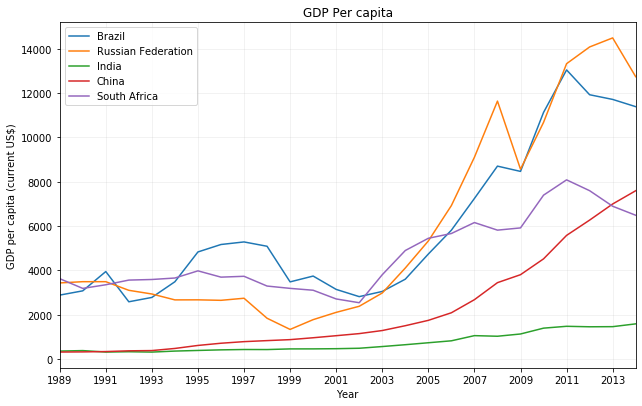

In [31]:
#set x,y variables
GDP_years = df_GDP.index #if theres a year with na

for index in range(len(country_code_list)):
    exec('%s_GDP = df_GDP[\'%s GDP\'].values' %(country_code_list[index],country_code_list[index]))
#BRA_GDP= df_GDP['BRA GDP'].values

fig = plt.figure(figsize = (10,6))

# to save the plot
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
ax_1.set_xlim([min(GDP_years), max(GDP_years)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#
ax_1.xaxis.set_ticks(np.arange(min(GDP_years), max(GDP_years), 2))
ax_1.set_xlabel('Year')
ax_1.set_ylabel(df_BRA_ind.columns[1])

#label the figure
ax_1.set_title('GDP Per capita')

for index in range(len(country_code_list)):
    exec('ax_1.plot(GDP_years,%s_GDP, label = \'%s\')' %(country_code_list[index],country_name_list[index]))


plt.legend()

#plt.savefig('./figures/figure_ALL_GDP_pp.pdf')
plt.savefig('./figures/figure_ALL_GDP_pp.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_GDP)' %(country_code_list[index]))
    

#plt.show()

- All countries 

In [32]:
# Correlation between countries
df_GDP.corr()

,BRA GDP,RUS GDP,IND GDP,CHN GDP,ZAF GDP
BRA GDP,1.000000,0.944149,0.952622,0.940448,0.923067
RUS GDP,0.944149,1.000000,0.959655,0.944643,0.940685
IND GDP,0.952622,0.959655,1.000000,0.974491,0.938875
CHN GDP,0.940448,0.944643,0.974491,1.000000,0.875863
ZAF GDP,0.923067,0.940685,0.938875,0.875863,1.000000


### 2) Correlation GDP per Capita

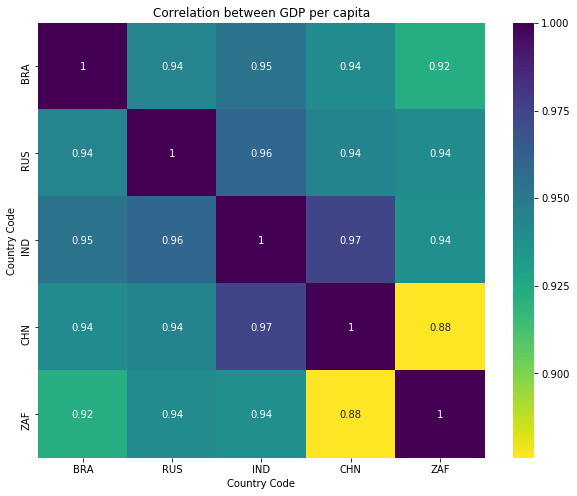

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data_all.xs(key=columns[1], axis = 1, level = 'Indicator').corr(), annot = True, cmap = 'viridis_r')
plt.title( 'Correlation between GDP per capita')
#plt.savefig('./figures/figure_Cor_GDP_pp.pdf')
plt.savefig('./figures/figure_Cor_GDP_pp.svg', format='svg', dpi=1200)

-Strong correlation between CHN and IND <br>
-Weak correlation between ZAF and CHN

In [34]:
#data_all.xs(key=columns[1], axis = 1, level = 'Indicator').corr()

### 3) GNI VS GDP

obs: if see if GNI << GDP 

In [35]:
df_GNI_curr = pd.DataFrame()
df_GDP_curr = pd.DataFrame()
for code in country_code_list:
    df_GNI_curr[code+' GNI current USD'] = data_all[code][columns[0]]
    df_GDP_curr[code+' GDP current USD'] = data_all[code][columns[2]]

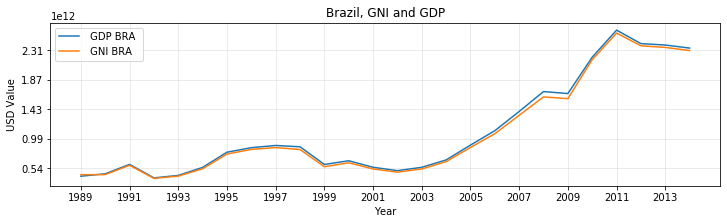

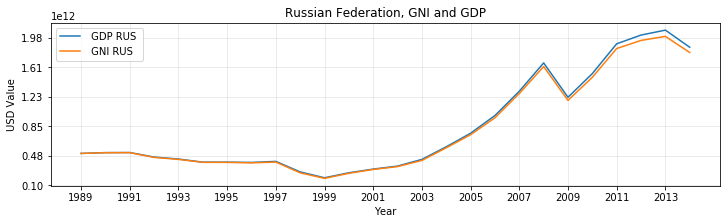

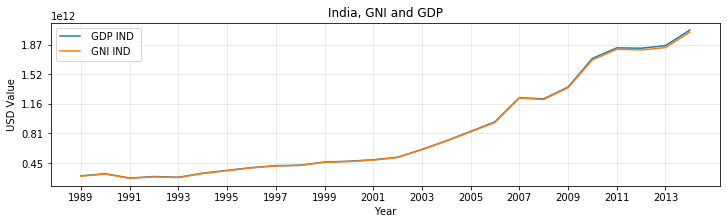

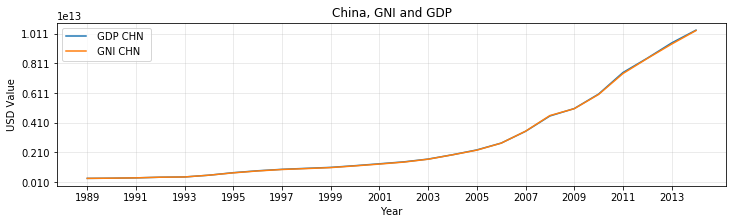

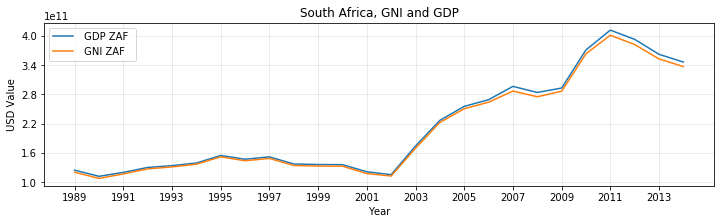

<Figure size 432x288 with 0 Axes>

In [36]:
years = df_GNI_curr.index

for index in range(len(country_code_list)):
    plt.figure(figsize = (12,3))
    
    plt.xlabel('Year')
    
    plt.xticks(np.arange(min(GDP_years), max(GDP_years), 2))
    plt.grid(axis = 'both', alpha = 0.3)
    plt.yticks(np.arange(10e10, 10e13, ((max(df_GDP_curr[df_GDP_curr.columns[index]])- min(df_GDP_curr[df_GDP_curr.columns[index]]))/5)))
    
    plt.ticklabel_format(style='sci', axis='y', useOffset= False)
    
    plt.ylabel('USD Value')
    exec('plt.title(\'%s, GNI and GDP\')'   %(country_name_list[index]))
    
    exec('plt.plot(years,df_GDP_curr[df_GDP_curr.columns[index]], label = \' GDP %s \')' % (country_code_list[index]))
    exec('plt.plot(years,df_GNI_curr[df_GNI_curr.columns[index]], label = \' GNI %s \')' % (country_code_list[index]))


    exec('plt.savefig(\'./figures/figure_GDP_GNI_%s.svg\',  format=\'svg\', dpi=1200)'% (country_code_list[index]))
    
    plt.legend()
    plt.show()

    
plt.tight_layout()


del(df_GNI_curr)
#plt.show()

- verifying if domestic product == national income, if GDP >> GNI means that wealth produced inside the country has been sent to other  countries

### 4) GDP Current 

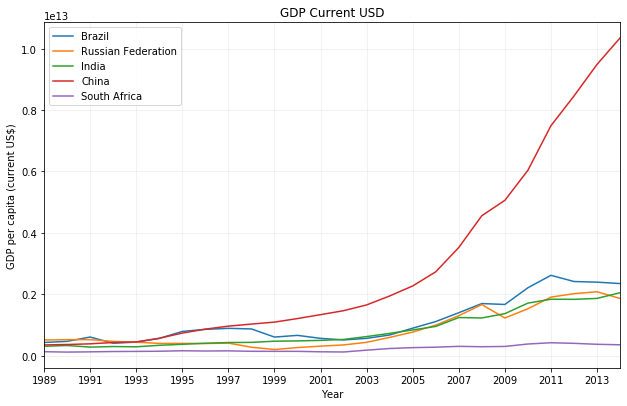

In [37]:
#set x,y variables
years = df_GDP.index #if theres a year with na

for index in range(len(country_code_list)):
    exec('%s_GDP_curr = df_GDP_curr[df_GDP_curr.columns[index]].values' %(country_code_list[index]))
#BRA_GDP= df_GDP['BRA GDP'].values

fig = plt.figure(figsize = (10,6))

# to save the plot
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
ax_1.set_xlim([min(GDP_years), max(GDP_years)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#
ax_1.xaxis.set_ticks(np.arange(min(GDP_years), max(GDP_years), 2))
ax_1.set_xlabel('Year')
ax_1.set_ylabel(df_BRA_ind.columns[1])

#label the figure
ax_1.set_title('GDP Current USD')

for index in range(len(country_code_list)):
    exec('ax_1.plot(GDP_years,%s_GDP_curr, label = \'%s\')' %(country_code_list[index],country_name_list[index]))


plt.legend()

#plt.savefig('./figures/figure_ALL_GDP_curr.pdf')
plt.savefig('./figures/figure_ALL_GDP_curr.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_GDP_curr)' %(country_code_list[index]))
    
#deleting df_GDP    
del(df_GDP_curr)
del(df_GDP)
#plt.show()

### 5) Correlation  -  GDP Current USD Values

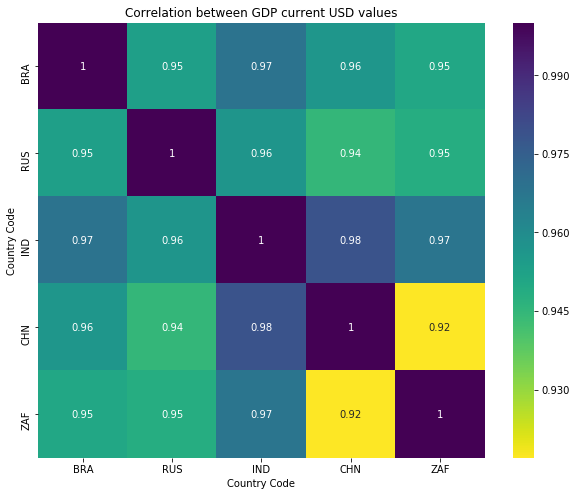

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data_all.xs(key=columns[2], axis = 1, level = 'Indicator').corr(), annot = True, cmap = 'viridis_r') #change rotate
plt.title( 'Correlation between GDP current USD values') #Change rotate
#plt.savefig('./figures/figure_Cor_GDP_curr.pdf') #Change rotate
plt.savefig('./figures/figure_Cor_GDP_curr.svg', format='svg', dpi=1200)


##### Economic Structure
    -Agriculture, value added (% of GDP)
    
    -Manufacturing, value added (% of GDP)
    
    -Services, etc., value added (% of GDP)
    


In [39]:
df_Agri  = pd.DataFrame()
df_Manu  = pd.DataFrame()
df_Serv  = pd.DataFrame()

for code in country_code_list:
    df_Agri[code+' Agri'] = data_all[code][columns[3]]
    df_Manu[code+' Manu'] = data_all[code][columns[4]]
    df_Serv[code+' Serv'] = data_all[code][columns[5]]

Ploting some graphs

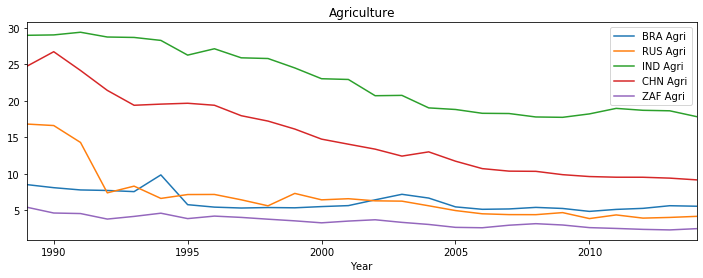

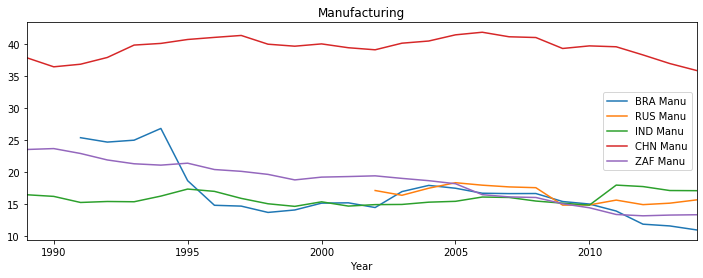

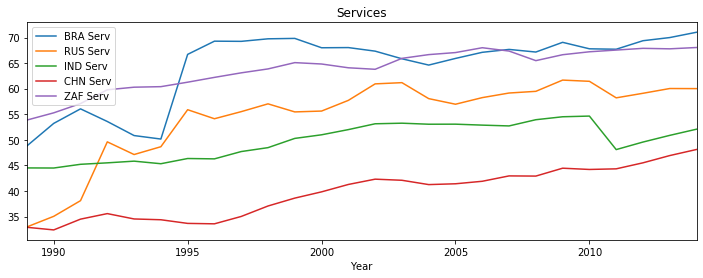

In [40]:
### Exploring 
df_Agri.plot(figsize=(12,4), title ='Agriculture')
df_Manu.plot(figsize=(12,4), title ='Manufacturing')
df_Serv.plot(figsize=(12,4), title ='Services')
plt.legend()

### 6) Stacked Bar plot

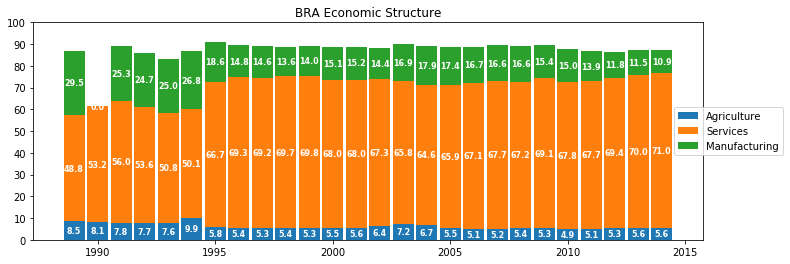

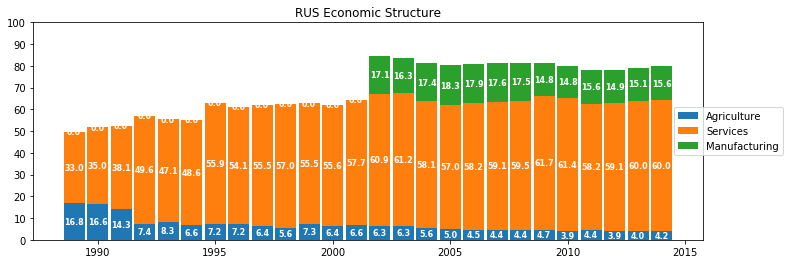

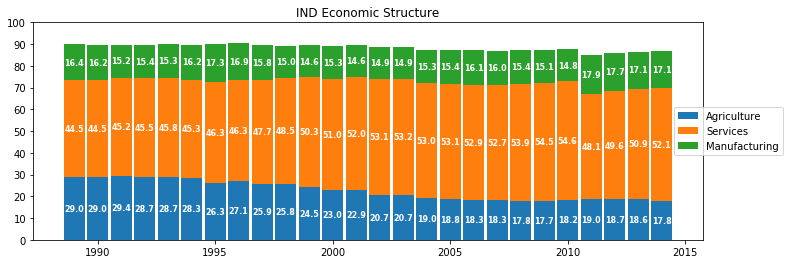

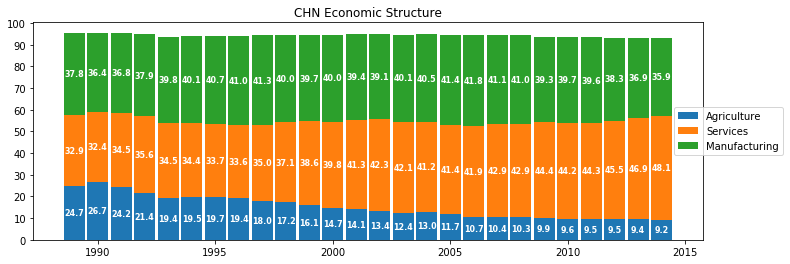

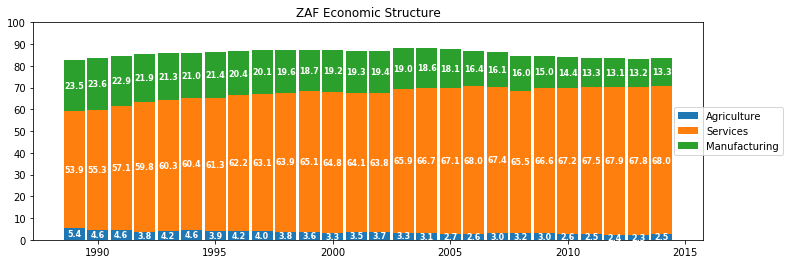

In [41]:
df_Agri  = pd.DataFrame()
df_Manu  = pd.DataFrame()
df_Serv  = pd.DataFrame()

for code in country_code_list:
    df_Agri[code+' Agri'] = data_all[code][columns[3]]
    df_Manu[code+' Manu'] = data_all[code][columns[4]]
    df_Serv[code+' Serv'] = data_all[code][columns[5]]


for code in country_code_list:
    exec('pd_%s_eco = pd.DataFrame()' %(code))
    
    servs = code + " Serv"
    manus = code + " Manu"
    agris = code + " Agri"
    
    width = .9
    plt.figure(figsize = (12,4))
    
    serv = df_Serv[servs].replace(np.nan, 0).values
    manu = df_Manu[manus].replace(np.nan, 0).values
    agri = df_Agri[agris].replace(np.nan, 0).values
    
    year = df_Serv.index
    

    
    p1 = plt.bar(year,agri, width)
    p2 = plt.bar(year,serv, width, bottom = np.array(agri))
    p3 = plt.bar(year,manu,  width, bottom = np.array(serv+agri))
    exec('plt.title(\'%s Economic Structure\')' %(code))
    
    plt.yticks(np.arange(0, 110, 10))

    plt.legend((p1[0],p2[0],p3[0]),
               ('Agriculture','Services','Manufacturing'),
               loc='center left',
               bbox_to_anchor=(0.95, 0.5)
               
              )
    
    
    
    for xpos, ypos, yval in zip(year, agri/2, agri):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", fontsize = 8, weight = 'bold',c ='w')
        
    
    for xpos, ypos, yval in zip(year, agri+serv/2, serv):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",fontsize = 8, weight = 'bold',c ='w')
    
    for xpos, ypos, yval in zip(year, agri+serv+manu/2, manu):
        plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",fontsize = 8, weight = 'bold',c ='w')
   
    
    
    #exec('plt.savefig(\'./figures/figure_%s_economic_struc.pdf\')' %(code))
    exec('plt.savefig(\'./figures/figure_%s_economic_struc.svg\',  format=\'svg\', dpi=1200)'% (code))    
    
    
    plt.show()
    
    
    
    
    
    
for code in country_code_list:
    exec('del(pd_%s_eco)' %(code))  

del(df_Agri)
del(df_Manu)
del(df_Serv)

### 7) Internal and External Balances
    
    -External balance on goods and services (% of GDP)

In [42]:
data_all['BRA'].columns

Index(['GNI (current US$)', 'GDP per capita (current US$)',
       'GDP at market prices (current US$)',
       'Agriculture, value added (% of GDP)',
       'Manufacturing, value added (% of GDP)',
       'Services, etc., value added (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'External balance on goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'CO2 emissions (metric tons per capita)', 'Population, total',
       'Life expectancy at birth, total (years)',
       'GINI index (World Bank estimate)',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Government expenditure on education as % of GDP (%)',
       'Adult literacy rate, population 15+ years, both sexes (%)',
       'Intentional homicides (per 100,000 people)'],
      dtype='object', name='Indicator')

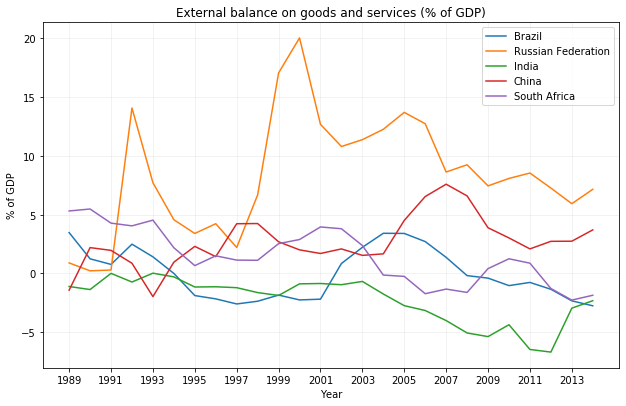

In [43]:
#Creating the Df
df_Ext = pd.DataFrame()
for code in country_code_list:
    df_Ext[code+' Ext'] = data_all[code][columns[7]]

#setting the x values    
years = df_Ext.index #if theres a year with na


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Ext = df_Ext[df_Ext.columns[index]].values' %(country_code_list[index]))

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#
ax_1.xaxis.set_ticks(np.arange(min(GDP_years), max(GDP_years), 2))
ax_1.set_xlabel('Year')
ax_1.set_ylabel('% of GDP')

#label the figure
ax_1.set_title(df_BRA_ind.columns[7])

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Ext, label = \'%s\')' %(country_code_list[index],country_name_list[index]))


plt.legend()

#plt.savefig('./figures/figure_ALL_Ext_balance_pct.pdf')
plt.savefig('./figures/figure_ALL_Ext_balance_pct.svg', format='svg', dpi=1200)


for index in range(len(country_code_list)):
    exec('del(%s_Ext)' %(country_code_list[index]))
del(df_Ext)

### Correlation 

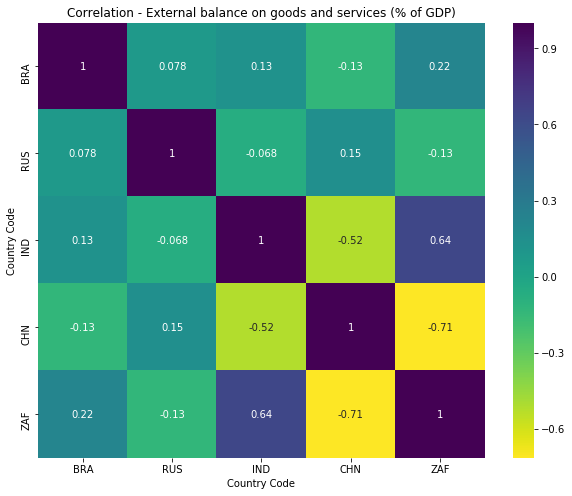

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(data_all.xs(key=columns[7], axis = 1, level = 'Indicator').corr(), annot = True, cmap = 'viridis_r') #change rotate
plt.title( 'Correlation - ' + data_all['BRA'].columns[7]) #Change rotate
#plt.savefig('./figures/figure_Corr_ext_balances.pdf') #Change rotate
plt.savefig('./figures/figure_Corr_ext_balances.svg', format='svg', dpi=1200)

### 8) CO2 Emissions
    -CO2 emissions (metric tons per capita)

In [45]:
data_all['BRA'].columns[9]

'CO2 emissions (metric tons per capita)'

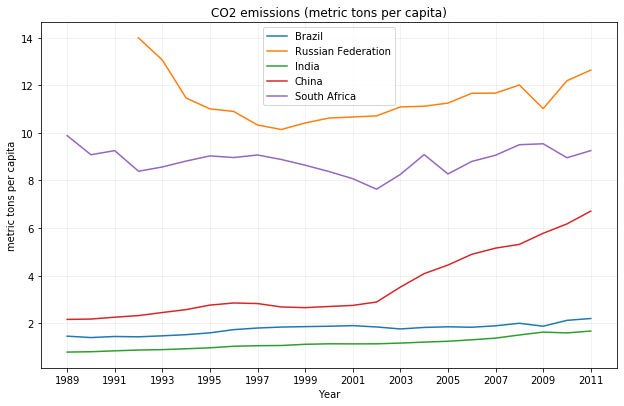

In [46]:
#Creating the Df
df_Co2 = pd.DataFrame()
for code in country_code_list:
    df_Co2[code+' Ext'] = data_all[code][columns[9]]

years = df_Co2.index #if theres a year with na


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Co2 = df_Co2[df_Co2.columns[index]].values' %(country_code_list[index]))

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#
ax_1.xaxis.set_ticks(np.arange(min(years), max(years), 2))
ax_1.set_xlabel('Year')
ax_1.set_ylabel('metric tons per capita')

#label the figure
ax_1.set_title(df_BRA_ind.columns[9])

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Co2, label = \'%s\')' %(country_code_list[index],country_name_list[index]))


plt.legend()

#plt.savefig('./figures/figure_ALL_Co2_pp.pdf')
plt.savefig('./figures/figure_ALL_Co2_pp.svg', format='svg', dpi=1200)


for index in range(len(country_code_list)):
    exec('del(%s_Co2)' %(country_code_list[index]))
del(df_Co2)

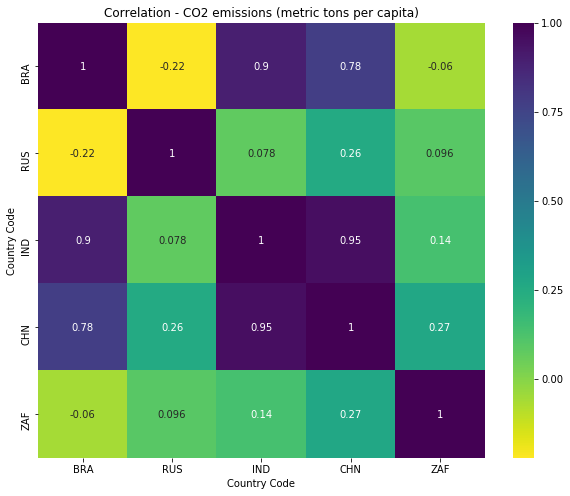

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(data_all.xs(key=columns[9], axis = 1, level = 'Indicator').corr(), annot = True, cmap = 'viridis_r') #change rotate
plt.title( 'Correlation - ' + data_all['BRA'].columns[9]) #Change rotate
#plt.savefig('./figures/figure_CO2.pdf') #Change rotate
plt.savefig('./figures/figure_CO2.svg', format='svg', dpi=1200)

### 9) Equality, Health and Education

#### 9.1) Population, total


In [48]:
data_all['BRA'].columns[10]

'Population, total'

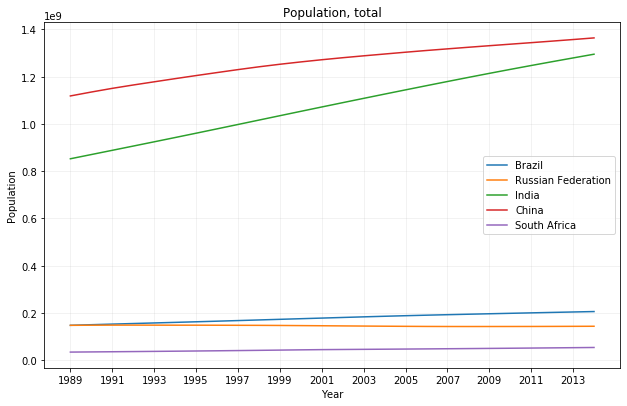

In [49]:
#Creating the Df
df_Pop = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Pop[code+' Ext'] = data_all[code][columns[10]] #<<<<<<<<<<<<<<<<<<<<<<

years = df_Pop.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Pop = df_Pop[df_Pop.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#
ax_1.xaxis.set_ticks(np.arange(min(years), max(years), 2)) 
ax_1.set_xlabel('Year')
ax_1.set_ylabel('Population') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[10]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Pop, label = \'%s\')' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Pop.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Pop.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_Pop)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Pop)

### 9) Equality, Health and Education

#### 9.2) Life expectancy at birth, total (years)

In [50]:
data_all['BRA'].columns[11]

'Life expectancy at birth, total (years)'

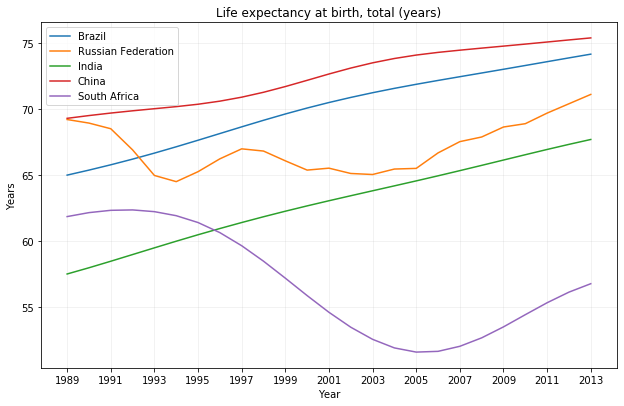

In [51]:
#Creating the Df
df_Life = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Life[code+' Ext'] = data_all[code][columns[11]] #<<<<<<<<<<<<<<<<<<<<<<

years = df_Life.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Life = df_Life[df_Life.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#
ax_1.xaxis.set_ticks(np.arange(min(years), max(years), 2)) 
ax_1.set_xlabel('Year')
ax_1.set_ylabel('Years') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[11]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Life, label = \'%s\')' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Life.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Life.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_Life)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Life)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3860268/

### 9) Equality, Health and Education

#### 9.2) GINI index (World Bank estimate)

In [52]:
for i, item in enumerate(data_all['BRA'].columns):
    print(i, item)

0 GNI (current US$)
1 GDP per capita (current US$)
2 GDP at market prices (current US$)
3 Agriculture, value added (% of GDP)
4 Manufacturing, value added (% of GDP)
5 Services, etc., value added (% of GDP)
6 Exports of goods and services (% of GDP)
7 External balance on goods and services (% of GDP)
8 Imports of goods and services (% of GDP)
9 CO2 emissions (metric tons per capita)
10 Population, total
11 Life expectancy at birth, total (years)
12 GINI index (World Bank estimate)
13 Birth rate, crude (per 1,000 people)
14 Death rate, crude (per 1,000 people)
15 Government expenditure on education as % of GDP (%)
16 Adult literacy rate, population 15+ years, both sexes (%)
17 Intentional homicides (per 100,000 people)


BRA_GINI dataframe has 26 values with 5 missing points 
5
RUS_GINI dataframe has 26 values with 8 missing points 
8
IND_GINI dataframe has 26 values with 23 missing points 
23
CHN_GINI dataframe has 26 values with 18 missing points 
18
ZAF_GINI dataframe has 26 values with 20 missing points 
20


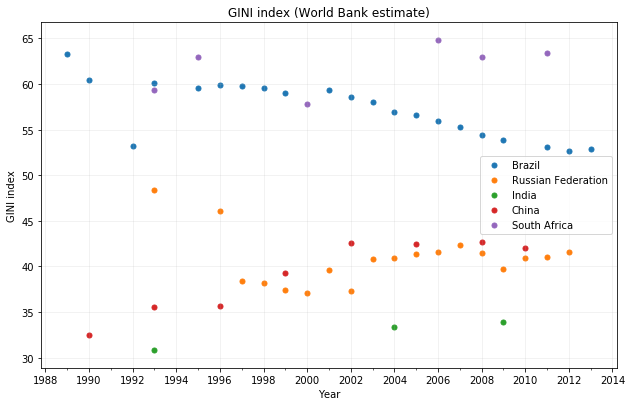

In [53]:
import matplotlib.ticker as ticker
#Creating the Df
df_GINI = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_GINI[code+' Ext'] = data_all[code][columns[12]] #<<<<<<<<<<<<<<<<<<<<<<

years = df_GINI.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_GINI = df_GINI[df_GINI.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#

#ax_1.xaxis.set_ticks(years,) 
#ax_1.yaxis.set_ticks(np.arange(0, 100, 5))



ax_1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(1))


ax_1.set_xlabel('Year')
ax_1.set_ylabel('GINI index') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[12]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.scatter(years,%s_GINI, label = \'%s\' , s = 25)' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

plt.tight_layout

#plt.savefig('./figures/figure_ALL_GINI.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_GINI.svg', format='svg', dpi=1200)

#info about the missing points

for i in country_code_list:
    exec('missing = len(%s_GINI) - np.count_nonzero(~np.isnan(%s_GINI))' %(i,i))
    exec('print(\'%s_GINI dataframe has {} values with {} missing points \'.format( len(%s_GINI), missing))' %(i,i))
    
    print(missing)

for index in range(len(country_code_list)):
    exec('del(%s_GINI)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_GINI)

### 9) Equality, Health and Education


#### 9.3) Birth rate, crude (per 1,000 people)

In [54]:
df_BRA_ind.columns[13]

'Birth rate, crude (per 1,000 people)'

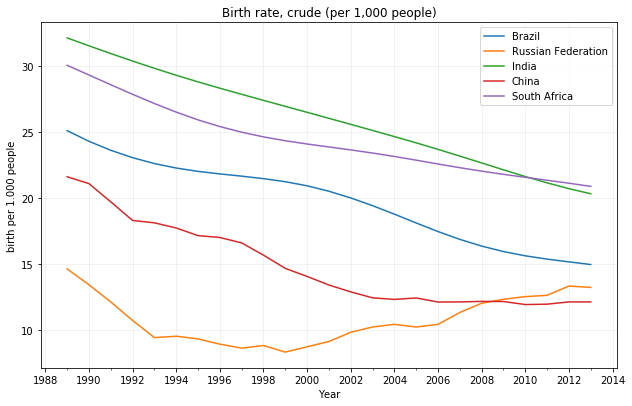

In [55]:
#Creating the Df
df_Birth = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Birth[code+' Ext'] = data_all[code][columns[13]] #<<<<<<<<<<<<<<<<<<<<<<

years = df_Birth.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Birth = df_Birth[df_Birth.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#

ax_1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(1))


ax_1.set_xlabel('Year')
ax_1.set_ylabel('birth per 1.000 people') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[13]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Birth, label = \'%s\')' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Birth.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Birth.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_Birth)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Birth)

### 9) Equality, Health and Education


#### 9.4) Death rate, crude (per 1,000 people)

In [56]:
df_BRA_ind.columns[14]

'Death rate, crude (per 1,000 people)'

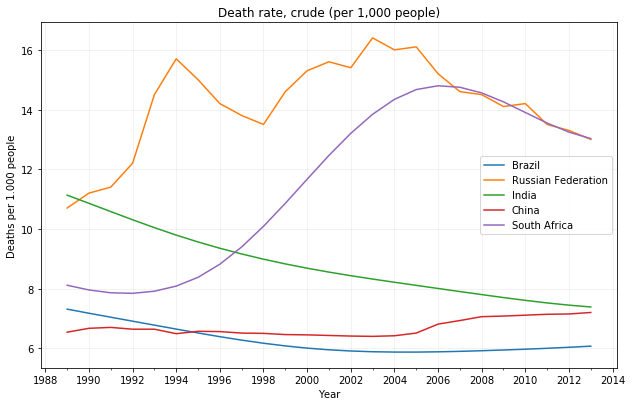

In [57]:
#Creating the Df
df_Death = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Death[code+' Ext'] = data_all[code][columns[14]] #<<<<<<<<<<<<<<<<<<<<<<
    
years = df_Death.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Death = df_Death[df_Death.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#

ax_1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(1))


ax_1.set_xlabel('Year')
ax_1.set_ylabel('Deaths per 1.000 people') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[14]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Death, label = \'%s\')' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Death.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Death.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_Death)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Death)

### 9) Equality, Health and Education


#### 9.5) Government expenditure on education as % of GDP (%)

In [58]:
df_BRA_ind.columns[15]

'Government expenditure on education as % of GDP (%)'

BRA_Gov_exp dataframe has 26 values with 11 missing points 
11
RUS_Gov_exp dataframe has 26 values with 18 missing points 
18
IND_Gov_exp dataframe has 26 values with 14 missing points 
14
CHN_Gov_exp dataframe has 26 values with 19 missing points 
19
ZAF_Gov_exp dataframe has 26 values with 5 missing points 
5


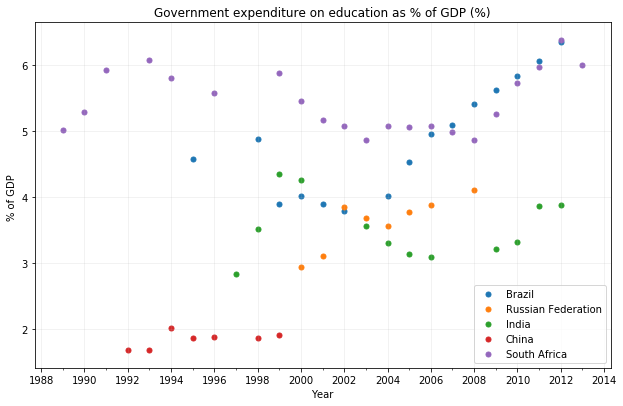

In [59]:
#Creating the Df
df_Gov_exp = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Gov_exp[code+' Ext'] = data_all[code][columns[15]] #<<<<<<<<<<<<<<<<<<<<<<
    
years = df_Gov_exp.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Gov_exp = df_Gov_exp[df_Gov_exp.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#

ax_1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(1))


ax_1.set_xlabel('Year')
ax_1.set_ylabel('% of GDP ') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[15]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.scatter(years,%s_Gov_exp, label = \'%s\', s = 25)' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Gov_exp.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Gov_exp.svg', format='svg', dpi=1200)



#info about the missing points

for i in country_code_list:
    exec('missing = len(%s_Gov_exp) - np.count_nonzero(~np.isnan(%s_Gov_exp))' %(i,i))
    exec('print(\'%s_Gov_exp dataframe has {} values with {} missing points \'.format( len(%s_Gov_exp), missing))' %(i,i))
    
    print(missing)
    

for index in range(len(country_code_list)):
    exec('del(%s_Gov_exp)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Gov_exp)

### 9) Equality, Health and Education


#### 9.6) Adult literacy rate, population 15+ years, both sexes (%)


In [60]:
df_BRA_ind.columns[16]

'Adult literacy rate, population 15+ years, both sexes (%)'

BRA_Adl dataframe has 26 values with 16 missing points 
16
RUS_Adl dataframe has 26 values with 23 missing points 
23
IND_Adl dataframe has 26 values with 22 missing points 
22
CHN_Adl dataframe has 26 values with 23 missing points 
23
ZAF_Adl dataframe has 26 values with 20 missing points 
20


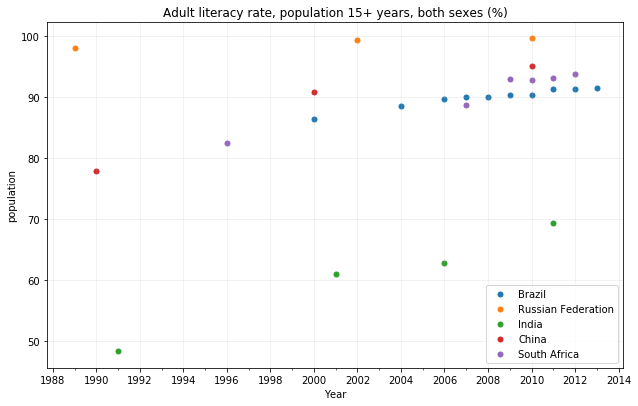

In [61]:
#Creating the Df
df_Adl = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Adl[code+' Ext'] = data_all[code][columns[16]] #<<<<<<<<<<<<<<<<<<<<<<
    
years = df_Adl.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Adl = df_Adl[df_Adl.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#

ax_1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(1))


ax_1.set_xlabel('Year')
ax_1.set_ylabel('population') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[16]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.scatter(years,%s_Adl, label = \'%s\', s = 25)' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Adult_Literacy.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Adult_Literacy.svg', format='svg', dpi=1200)

for i in country_code_list:
    exec('missing = len(%s_Adl) - np.count_nonzero(~np.isnan(%s_Adl))' %(i,i))
    exec('print(\'%s_Adl dataframe has {} values with {} missing points \'.format( len(%s_Adl), missing))' %(i,i))
    
    print(missing)

for index in range(len(country_code_list)):
    exec('del(%s_Adl)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Adl)

### 9) Equality, Health and Education


#### 9.5) Intentional homicides (per 100,000 people)


In [62]:
df_BRA_ind.columns[17]

'Intentional homicides (per 100,000 people)'

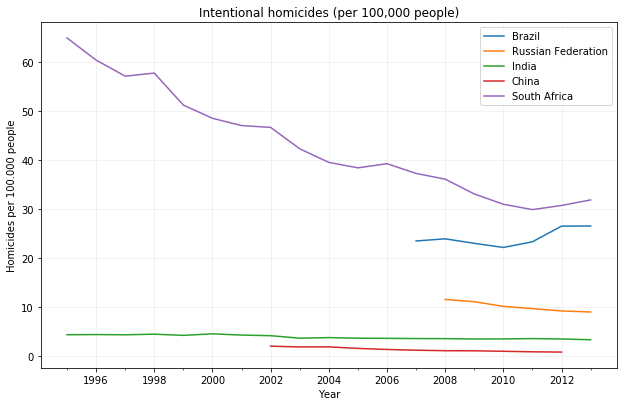

In [63]:
#Creating the Df
df_Hom = pd.DataFrame()   #<<<<<<<<<<<<<<<<<<<<<<
for code in country_code_list:
    df_Hom[code+' Ext'] = data_all[code][columns[17]] #<<<<<<<<<<<<<<<<<<<<<<
    
years = df_Hom.index #if theres a year with na #<<<<<<<<<<<<<<<<<<<<<<


#creating dfs to fetch data
for index in range(len(country_code_list)):
    exec('%s_Hom = df_Hom[df_Hom.columns[index]].values' %(country_code_list[index])) #<<<<<<<<<<<<<<<<<<<<<<

#setting the figsize
fig = plt.figure(figsize = (10,6))

# to save the plot with padding
ax_1 = fig.add_axes([0.1,0.12,0.8,.8])

#set limits x and y axis:
#ax_1.set_xlim([min(df_Ext), max(df_Ext)])
                     
    
#set grid

ax_1.xaxis.grid(alpha=0.2)
ax_1.yaxis.grid(alpha=0.2)

#

ax_1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(1))


ax_1.set_xlabel('Year')
ax_1.set_ylabel('Homicides per 100.000 people') #<<<<<<<<<<<<<<<<<<<<<<

#label the figure
ax_1.set_title(df_BRA_ind.columns[17]) #<<<<<<<<<<<<<<<<<<<<<<

for index in range(len(country_code_list)):
    exec('ax_1.plot(years,%s_Hom, label = \'%s\')' %(country_code_list[index],country_name_list[index])) #<<<<<<<<<<<<<<<<<<<<<<


plt.legend()

#plt.savefig('./figures/figure_ALL_Homicides.pdf') #<<<<<<<<<<<<<<<<<<<<<<
plt.savefig('./figures/figure_ALL_Homicides.svg', format='svg', dpi=1200)

for index in range(len(country_code_list)):
    exec('del(%s_Hom)' %(country_code_list[index]))#<<<<<<<<<<<<<<<<<<<<<<
del(df_Hom)

### Exploring further correlations

In [64]:
#Creating the Df
df_Ext = pd.DataFrame()
for code in country_code_list:
    df_Ext[code+' Ext'] = data_all[code][columns[7]]
    

df_GDP_curr = pd.DataFrame()
for code in country_code_list:
    df_GDP_curr[code+' GDP current USD'] = data_all[code][columns[2]]    

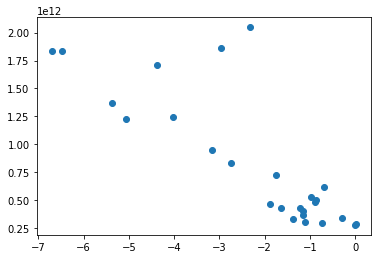

In [65]:
x = df_Ext[df_Ext.columns[2]].values
y = df_GDP_curr[df_GDP_curr.columns[2]].values

plt.scatter(x,y)

In [66]:
for index in range(len(country_code_list)):
    print(country_code_list[index])
    print('Correlation : Ext balances vs GDP  is %.2f'%(df_Ext[df_Ext.columns[index]].corr(df_GDP_curr[df_GDP_curr.columns[index]])))

BRA
Correlation : Ext balances vs GDP  is -0.39
RUS
Correlation : Ext balances vs GDP  is -0.10
IND
Correlation : Ext balances vs GDP  is -0.82
CHN
Correlation : Ext balances vs GDP  is 0.32
ZAF
Correlation : Ext balances vs GDP  is -0.77
